In [1]:
import pandas as pd
import os 
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Arial'

In [2]:
def subs(x):
    if x<0:
        return -x
    elif x>0:
        return 0
    else:
        return x

In [18]:
wages=pd.read_excel('0928 shoes data and codebook.xlsx',sheet_name='wages')
prod=pd.read_excel('orderproductiondata2.xlsx')
# prod=pd.read_excel('0928 shoes data and codebook.xlsx',sheet_name='prod')
prod.head(3)

,batch,artno,OrderDate,customername,country,order,price,currencyunit,payment_mode,dlydate,...,chargedon,stylecode,last,PlannedMin,PlannedHrs,chargedate,chargemonth,extendtime,extenddelivery,extenddlymonth
0,160968,A211760-Sparky,2020-02-22,Sparky,UK,2011765797-NDC-Stoke,7.75,GBP,6.0,2020-11-06,...,2022-01-12 19:18:22,148438,Zenith Wide-Black,275.00,4.583333,2022-01-12,1,NaT,2020-11-06,11.0
1,163687,A211737-Rhino,2020-09-30,Rhino,NaN,4500074827 - US,18.70,USD,0.0,2020-12-07,...,2022-01-18 21:07:42,158468,Kells Bay RW2489-Limestone,180.00,3.000000,2022-01-18,1,2021-01-19,2021-01-19,1.0
2,163602,S201508-Bull -D,2020-09-30,Bull-A,NaN,359385,18.00,USD,0.0,2020-12-09,...,2022-01-06 20:14:17,136813,New Haven-COGNAC MULTI,229.68,3.828000,2022-01-06,1,NaT,2020-12-09,12.0


In [19]:
prod=prod.loc[:prod[prod.pairs.isna()].index.min()-1, :]

In [5]:
allConveyors=wages.conveyor.unique()

## `allcus`, `cus*`, `cus*ps`, shares, avgPrices

In [20]:
prod['totalSale']=prod.priceUSD * prod.pairs
wages.attrition=wages.groupby('conveyor').workers.pct_change().apply(subs)

for i in range(0,3):
        wages[f'cus{i+1}price']=pd.NA

for i,r in wages.iterrows():
    conveyor=r.conveyor
    month=r.month
    # prod_filtered=prod[(prod.conveyor==conveyor)&(prod.extenddlymonth==month)]
    prod_filtered=prod[(prod.conveyor==conveyor)&(prod.chargemonth==month)]
    info=prod_filtered.groupby('buyername')[['totalSale','pairs']].agg('sum').sort_values('pairs',ascending=0).to_dict()
    totalSale=info['totalSale']
    totalPairs=info['pairs']
    avgPrices=dict(zip(totalSale.keys(), [totalSale[x]/totalPairs[x] for x in totalSale.keys()]))

    try:
        totalAvgPrice=sum(totalSale.values())/sum(totalPairs.values())
    except ZeroDivisionError:
        totalAvgPrice=pd.NA

    try:
            minAvgPrice=min(avgPrices.values())
            maxAvgPrice=max(avgPrices.values())
    except ValueError:
            minAvgPrice=pd.NA
            maxAvgPrice=pd.NA  
            
    wages.loc[i,'allps']=sum(totalPairs.values())
    for rank in range(0,6):
        try:
            wages.loc[i,f'cus{rank+1}']=list(totalPairs.keys())[rank]
            wages.loc[i,f'cus{rank+1}ps']=totalPairs[list(totalPairs.keys())[rank]]
        except:
            continue
    
    # avgPrices
    for ii in range(0,3):
        try:
            wages.loc[i, f'cus{ii+1}price']=list(avgPrices.values())[ii]
        except:
            continue

    wages.loc[i, "totalPairNum"]=sum(totalPairs.values()) # newly add (Oct 1)
    wages.loc[i, "avgprice"]=totalAvgPrice
    wages.loc[i, "minprice"]=minAvgPrice
    wages.loc[i, "maxprice"]=maxAvgPrice

    # numbuyers,numstyles,numartno, numbatches
    wages.loc[i, "numbuyers"]=prod_filtered.buyername.nunique()
    wages.loc[i, "numstyles"]=prod_filtered.stylecode.nunique()
    wages.loc[i, "numartno"]=prod_filtered.artno.nunique()
    wages.loc[i, "numbatches"]=prod_filtered.batch.nunique()

# share
wages['cus1share']=(wages.cus1ps/wages.allps)*100
wages

C:\Users\JselZ\AppData\Local\Temp\ipykernel_15532\358712397.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Curfu' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  wages.loc[i,f'cus{rank+1}']=list(totalPairs.keys())[rank]
C:\Users\JselZ\AppData\Local\Temp\ipykernel_15532\358712397.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Rhino' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  wages.loc[i,f'cus{rank+1}']=list(totalPairs.keys())[rank]
C:\Users\JselZ\AppData\Local\Temp\ipykernel_15532\358712397.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Bull' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  wag

,conveyor,month,all_salary,workers,avg_pay,attrition,cus1,cus1ps,cus2,cus2ps,...,avgprice,minprice,maxprice,numbuyers,numstyles,numartno,numbatches,cus6,cus6ps,cus1share
0,A-1,1,1119218.3,126,8882.684921,NaN,Curfu,12579.0,Rhino,11962.0,...,17.847628,15.223897,19.238029,4.0,23.0,15.0,32.0,NaN,NaN,47.907225
1,A-1,2,1059743.7,114,9295.997368,0.095238,Rhino,18270.0,Curfu,8524.0,...,17.196072,15.202694,18.353362,4.0,20.0,13.0,46.0,NaN,NaN,54.739933
2,A-1,3,1042766.2,117,8912.531624,0.000000,Curfu,21435.0,Rhino,14011.0,...,17.885280,16.534940,21.200001,3.0,15.0,6.0,30.0,NaN,NaN,58.901926
3,A-1,4,1003444.4,116,8650.382759,0.008547,Rhino,21595.0,Curfu,146.0,...,21.162123,16.983904,21.450001,3.0,14.0,8.0,56.0,NaN,NaN,98.837475
4,A-1,5,1042253.3,117,8908.147863,0.000000,Rhino,21284.0,NaN,NaN,...,21.152287,21.152287,21.152287,1.0,9.0,5.0,19.0,NaN,NaN,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,C-6,9,298253.1,38,7848.765789,0.173913,Crown,685.0,NaN,NaN,...,19.170000,19.170000,19.170000,1.0,1.0,1.0,1.0,NaN,NaN,100.000000
126,C-7,6,358132.7,48,7461.097917,NaN,Crown,11017.0,Rhino,72.0,...,16.057482,16.025704,20.920000,2.0,10.0,7.0,10.0,NaN,NaN,99.350708
127,C-7,7,384174.2,49,7840.289796,0.000000,Crown,4990.0,Rhino,618.0,...,20.844607,20.730000,21.770000,2.0,5.0,3.0,9.0,NaN,NaN,88.980029
128,C-7,8,400679.3,52,7705.371154,0.000000,Crown,2532.0,Sparky,1512.0,...,19.487630,17.407154,20.730000,2.0,8.0,3.0,11.0,NaN,NaN,62.611276


## `*ch`(change)

In [21]:
# wages['pschange']=wages.groupby('conveyor')['allps'].pct_change()*100
# wages['stylesch']=wages.groupby('conveyor')['numstyles'].pct_change()*100
# wages['artnoch']=wages.groupby('conveyor')['numartno'].pct_change()*100

wages['pschange']=wages.groupby('conveyor')['allps'].pct_change()*100
wages['stylesch']=wages.groupby('conveyor')['numstyles'].diff()
wages['artnoch']=wages.groupby('conveyor')['numartno'].diff()

wages

,conveyor,month,all_salary,workers,avg_pay,attrition,cus1,cus1ps,cus2,cus2ps,...,numbuyers,numstyles,numartno,numbatches,cus6,cus6ps,cus1share,pschange,stylesch,artnoch
0,A-1,1,1119218.3,126,8882.684921,NaN,Curfu,12579.0,Rhino,11962.0,...,4.0,23.0,15.0,32.0,NaN,NaN,47.907225,NaN,NaN,NaN
1,A-1,2,1059743.7,114,9295.997368,0.095238,Rhino,18270.0,Curfu,8524.0,...,4.0,20.0,13.0,46.0,NaN,NaN,54.739933,27.112770,-3.0,-2.0
2,A-1,3,1042766.2,117,8912.531624,0.000000,Curfu,21435.0,Rhino,14011.0,...,3.0,15.0,6.0,30.0,NaN,NaN,58.901926,9.033437,-5.0,-7.0
3,A-1,4,1003444.4,116,8650.382759,0.008547,Rhino,21595.0,Curfu,146.0,...,3.0,14.0,8.0,56.0,NaN,NaN,98.837475,-39.960430,-1.0,2.0
4,A-1,5,1042253.3,117,8908.147863,0.000000,Rhino,21284.0,NaN,NaN,...,1.0,9.0,5.0,19.0,NaN,NaN,100.000000,-2.585931,-5.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,C-6,9,298253.1,38,7848.765789,0.173913,Crown,685.0,NaN,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,100.000000,inf,1.0,1.0
126,C-7,6,358132.7,48,7461.097917,NaN,Crown,11017.0,Rhino,72.0,...,2.0,10.0,7.0,10.0,NaN,NaN,99.350708,NaN,NaN,NaN
127,C-7,7,384174.2,49,7840.289796,0.000000,Crown,4990.0,Rhino,618.0,...,2.0,5.0,3.0,9.0,NaN,NaN,88.980029,-49.427360,-5.0,-4.0
128,C-7,8,400679.3,52,7705.371154,0.000000,Crown,2532.0,Sparky,1512.0,...,2.0,8.0,3.0,11.0,NaN,NaN,62.611276,-27.888730,3.0,0.0


# scores

In [11]:
scores=pd.read_excel("buyer scoring1.xlsx",sheet_name='scoresCleaned')
scores=scores.replace(r"\xa0", '', regex=True)
scores=scores.set_index('buyer').to_dict()
scores

{'mbordering': {'Rhino': '3',
  'Bull': '3',
  'Crown': '3',
  'Sparky': '3',
  'T4 FSPL': '2',
  'Tampa': '3'},
 'mbleadtime': {'Rhino': '2',
  'Bull': '2',
  'Crown': '2',
  'Sparky': '2',
  'T4 FSPL': '1',
  'Tampa': '2'},
 'mbpricing': {'Rhino': '3',
  'Bull': '2.5',
  'Crown': '3',
  'Sparky': '2.5',
  'T4 FSPL': '1',
  'Tampa': '3'},
 'mbpay': {'Rhino': '1',
  'Bull': '2',
  'Crown': '2',
  'Sparky': '2',
  'T4 FSPL': '3',
  'Tampa': '3'}}

In [22]:
wages['cus1']=wages['cus1'].str.strip()
for score in list(scores.keys()):
    wages[score]=wages['cus1'].map(scores[score])

In [23]:
wages

,conveyor,month,all_salary,workers,avg_pay,attrition,cus1,cus1ps,cus2,cus2ps,...,cus6,cus6ps,cus1share,pschange,stylesch,artnoch,mbordering,mbleadtime,mbpricing,mbpay
0,A-1,1,1119218.3,126,8882.684921,NaN,Curfu,12579.0,Rhino,11962.0,...,NaN,NaN,47.907225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A-1,2,1059743.7,114,9295.997368,0.095238,Rhino,18270.0,Curfu,8524.0,...,NaN,NaN,54.739933,27.112770,-3.0,-2.0,3,2,3,1
2,A-1,3,1042766.2,117,8912.531624,0.000000,Curfu,21435.0,Rhino,14011.0,...,NaN,NaN,58.901926,9.033437,-5.0,-7.0,NaN,NaN,NaN,NaN
3,A-1,4,1003444.4,116,8650.382759,0.008547,Rhino,21595.0,Curfu,146.0,...,NaN,NaN,98.837475,-39.960430,-1.0,2.0,3,2,3,1
4,A-1,5,1042253.3,117,8908.147863,0.000000,Rhino,21284.0,NaN,NaN,...,NaN,NaN,100.000000,-2.585931,-5.0,-3.0,3,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,C-6,9,298253.1,38,7848.765789,0.173913,Crown,685.0,NaN,NaN,...,NaN,NaN,100.000000,inf,1.0,1.0,3,2,3,2
126,C-7,6,358132.7,48,7461.097917,NaN,Crown,11017.0,Rhino,72.0,...,NaN,NaN,99.350708,NaN,NaN,NaN,3,2,3,2
127,C-7,7,384174.2,49,7840.289796,0.000000,Crown,4990.0,Rhino,618.0,...,NaN,NaN,88.980029,-49.427360,-5.0,-4.0,3,2,3,2
128,C-7,8,400679.3,52,7705.371154,0.000000,Crown,2532.0,Sparky,1512.0,...,NaN,NaN,62.611276,-27.888730,3.0,0.0,3,2,3,2


## export

In [24]:
# wages.to_csv('wages_final.csv',index=0)
wages.to_csv('wages_charge_month.csv',index=0)

## scatter

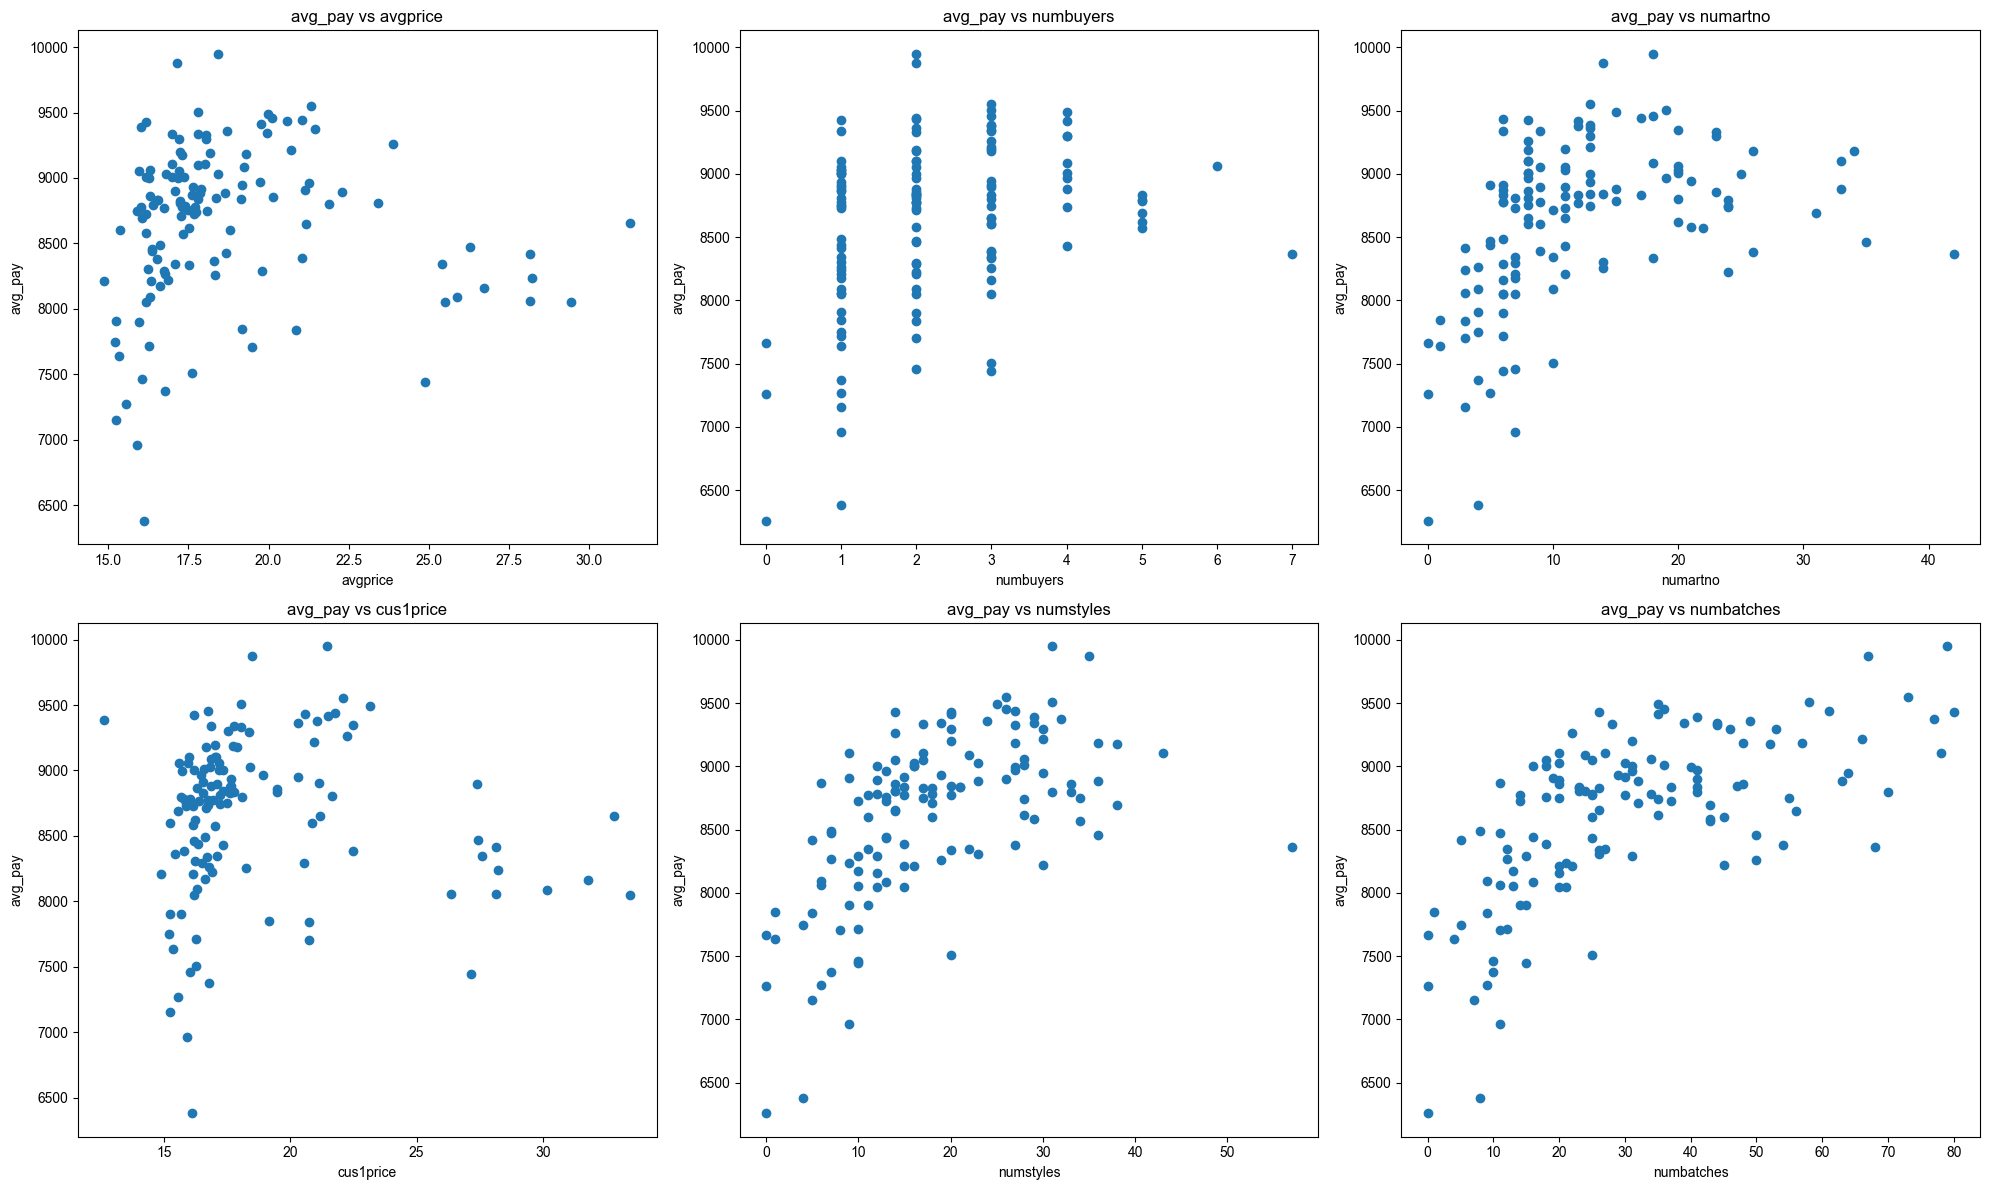

In [25]:
fig, axs = plt.subplots(2,3, figsize=(20, 12))
variables = ["avgprice", "cus1price", "numbuyers", "numstyles", "numartno", "numbatches"]
for i, var in enumerate(variables):
    ax = axs[i % 2,i // 2]
    df_plot = wages[[var, 'avg_pay']].dropna()
    ax.scatter(df_plot[var], df_plot['avg_pay'])
    ax.set_title(f'avg_pay vs {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('avg_pay')

fig.tight_layout()

plt.show()

In [20]:
wages[["avgprice", "cus1price", "numbuyers", "numstyles", "numartno", "numbatches",'avg_pay']].dropna().corr(method='pearson')

,avgprice,cus1price,numbuyers,numstyles,numartno,numbatches,avg_pay
avgprice,1.000000,0.942624,0.122623,-0.091611,-0.155590,0.031451,0.011459
cus1price,0.942624,1.000000,0.059066,-0.139830,-0.222293,-0.022477,-0.019790
numbuyers,0.122623,0.059066,1.000000,0.565033,0.544523,0.441974,0.256284
numstyles,-0.091611,-0.139830,0.565033,1.000000,0.825530,0.819930,0.463855
numartno,-0.155590,-0.222293,0.544523,0.825530,1.000000,0.583471,0.380395
numbatches,0.031451,-0.022477,0.441974,0.819930,0.583471,1.000000,0.498617
avg_pay,0.011459,-0.019790,0.256284,0.463855,0.380395,0.498617,1.000000
